# STAT306 Final Group 19

# Data Description

In [1]:
# Library Imports
library(tidyverse)
library(corrplot)
library(ggplot2)
library(car)
library(GGally)
library(rsample)
library(caret)


#if needed
#install.packages("corrplot", dependencies=TRUE, repos='http://cran.rstudio.com/')
#install.packages("rsample", dependencies = TRUE, repos = "https://cloud.r-project.org/")

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
corrplot 0.95 loaded

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘packa

In [2]:
gym_membership_data <- read_csv("gym_members_exercise_tracking.csv")
head(gym_membership_data)

Rows: 973 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): Gender, Workout_Type
dbl (13): Age, Weight (kg), Height (m), Max_BPM, Avg_BPM, Resting_BPM, Sessi...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55


In [3]:
num_cols <- ncol(gym_membership_data)
cat("This dataset has", num_cols ,"variables.")

This dataset has 15 variables.

In [4]:
n <- nrow(gym_membership_data)
cat("This dataset has", n ,"observations.")

This dataset has 973 observations.

| Variable | Description |
|----------|-------------|
| `Age` | Age of the gym member (years) |
| `Gender` | Gender of the gym member (Male or Female) |
| `Weight` | Member’s weight in kilograms (kg) |
| `Height` | Member’s height in meters (m) |
| `Max_BPM` | Maximum heart rate during workout sessions (beats per minute) |
| `Avg_BPM` | Average heart rate during workout sessions (beats per minute) |
| `Resting_BPM` | Heart rate at rest before workout (beats per minute) |
| `Session_Duration` | Duration of each workout session (hours) |
| `Calories_Burned` | Total calories burned during each session |
| `Workout_Type` | Type of workout performed (e.g., Cardio, Strength, Yoga, HIIT) |
| `Fat_Percentage` | Body fat percentage of the member (%) |
| `Water_Intake` | Daily water intake during workouts (liters) |
| `Workout_Frequency` | Number of workout sessions per week (days/week) |
| `Experience_Level` | Level of experience, from beginner (1) to expert (3) |
| `BMI` | Body Mass Index (Weight in kg / (Height in m)^2) |

# Questions for Investigation

## Insert text here


# Exploratory Data Analysis (EDA)

In [5]:
head(gym_membership_data, 10)

Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
56,Male,88.3,1.71,180,157,60,1.69,1313,Yoga,12.6,3.5,4,3,30.20
46,Female,74.9,1.53,179,151,66,1.30,883,HIIT,33.9,2.1,4,2,32.00
32,Female,68.1,1.66,167,122,54,1.11,677,Cardio,33.4,2.3,4,2,24.71
25,Male,53.2,1.70,190,164,56,0.59,532,Strength,28.8,2.1,3,1,18.41
38,Male,46.1,1.79,188,158,68,0.64,556,Strength,29.2,2.8,3,1,14.39
56,Female,58.0,1.68,168,156,74,1.59,1116,HIIT,15.5,2.7,5,3,20.55
36,Male,70.3,1.72,174,169,73,1.49,1385,Cardio,21.3,2.3,3,2,23.76
40,Female,69.7,1.51,189,141,64,1.27,895,Cardio,30.6,1.9,3,2,30.57
28,Male,121.7,1.94,185,127,52,1.03,719,Strength,28.9,2.6,4,2,32.34


In [6]:
gym_membership_data <- gym_membership_data %>%
  mutate(Gender = as.factor(Gender),
         Workout_Type = as.factor(Workout_Type),
         Experience_Level = as.factor(Experience_Level))

In [7]:
# check for NA
colSums(is.na(gym_membership_data))

Age                        Gender 
                            0                             0 
                  Weight (kg)                    Height (m) 
                            0                             0 
                      Max_BPM                       Avg_BPM 
                            0                             0 
                  Resting_BPM      Session_Duration (hours) 
                            0                             0 
              Calories_Burned                  Workout_Type 
                            0                             0 
               Fat_Percentage         Water_Intake (liters) 
                            0                             0 
Workout_Frequency (days/week)              Experience_Level 
                            0                             0 
                          BMI 
                            0

In [32]:
names(gym_membership_data) <- make.names(names(gym_membership_data))
colnames(gym_membership_data)

[1] "Age"                           "Gender"                       
 [3] "Weight..kg."                   "Height..m."                   
 [5] "Max_BPM"                       "Avg_BPM"                      
 [7] "Resting_BPM"                   "Session_Duration..hours."     
 [9] "Calories_Burned"               "Workout_Type"                 
[11] "Fat_Percentage"                "Water_Intake..liters."        
[13] "Workout_Frequency..days.week." "Experience_Level"             
[15] "BMI"

## Data Visualization

In [28]:
# gym_membership_pair_plots <- 
#     gym_membership_data %>%
#     ggpairs(progress = FALSE) +
#     ggtitle("Pairwise Plots of All Variables") +
#     theme(
#         plot.title = element_text(face = "bold", hjust = 0.5, size = 18),
#         text = element_text(size = 10),
#         axis.title = element_text(face = "bold")
#     ) 

# gym_membership_pair_plots

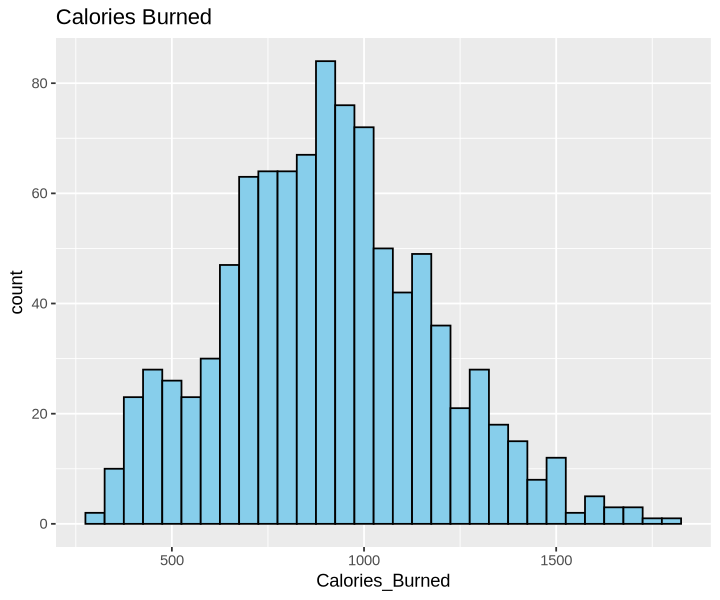

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


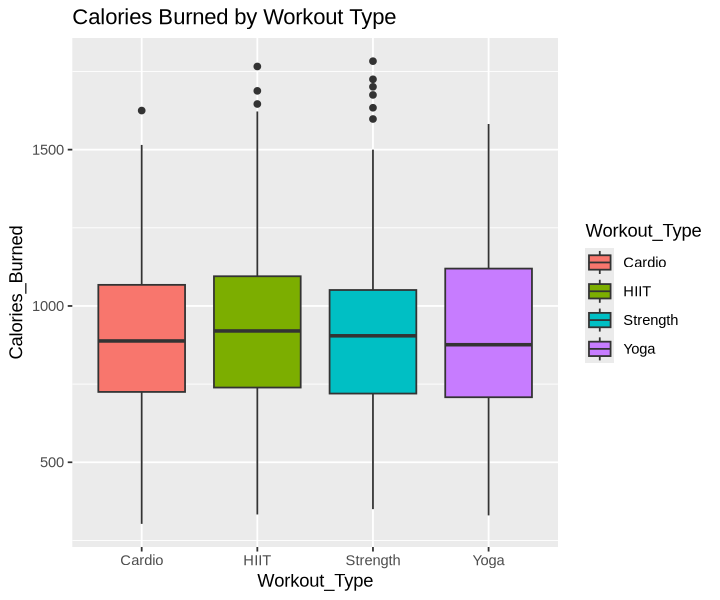

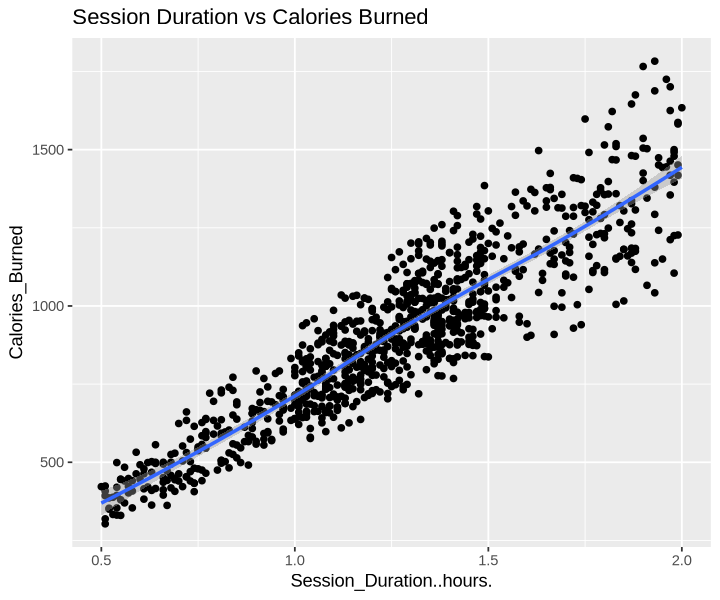

In [34]:
options(repr.plot.width = 6, repr.plot.height = 5)
ggplot(gym_membership_data, aes(x = Calories_Burned)) +
  geom_histogram(binwidth = 50, fill = "skyblue", color = "black") +
  labs(title = "Calories Burned")

ggplot(gym_membership_data, aes(x = Workout_Type, y = Calories_Burned, fill = Workout_Type)) +
  geom_boxplot() +
  labs(title = "Calories Burned by Workout Type")

ggplot(gym_membership_data, aes(x = Session_Duration..hours., y = Calories_Burned)) +
  geom_point() +
  geom_smooth() +
  labs(title = "Session Duration vs Calories Burned")


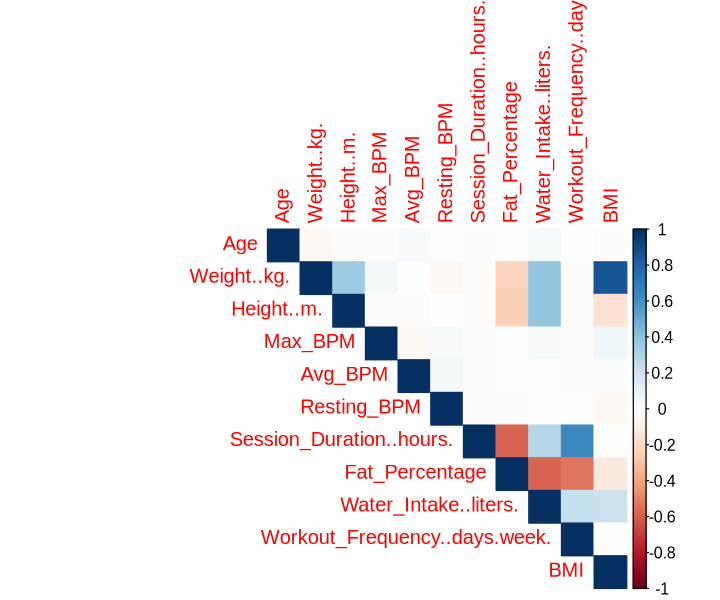

In [35]:
# Correlation matrix for numeric variables
options(repr.plot.width = 6, repr.plot.height = 5)
num_vars <- gym_membership_data %>% 
    select(where(is.numeric)) %>% 
    select(-Calories_Burned)
corrplot(cor(num_vars), method = "color", type = "upper")

# Base model + motivation for feature selection

In [36]:
split <- initial_split(gym_membership_data, prop = 0.7)
gym_membership_train <- training(split)
gym_membership_test <- testing(split)

In [37]:
base_model <- lm(Calories_Burned ~ ., data = gym_membership_train)
summary(base_model)


Call:
lm(formula = Calories_Burned ~ ., data = gym_membership_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-121.433  -23.808   -1.887   22.425  164.226 

Coefficients:
                                Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -978.94174  104.70023  -9.350  < 2e-16 ***
Age                             -3.46134    0.12429 -27.849  < 2e-16 ***
GenderMale                      78.42369    6.30500  12.438  < 2e-16 ***
Weight..kg.                     -0.83680    0.60815  -1.376  0.16929    
Height..m.                      97.26659   56.21600   1.730  0.08405 .  
Max_BPM                         -0.04887    0.12977  -0.377  0.70663    
Avg_BPM                          6.16862    0.10540  58.526  < 2e-16 ***
Resting_BPM                      0.56186    0.20742   2.709  0.00693 ** 
Session_Duration..hours.       715.04749    7.12735 100.325  < 2e-16 ***
Workout_TypeHIIT                -2.57786    4.28567  -0.602  0.54771    
Workout_

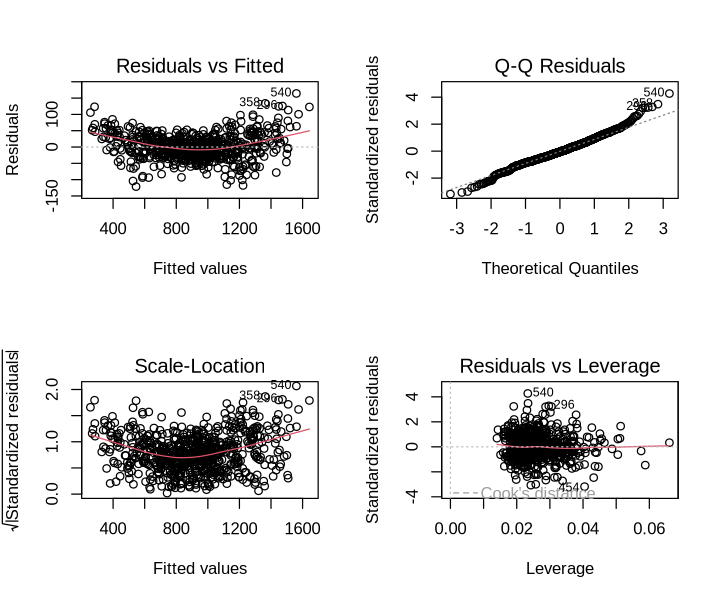

In [38]:
par(mfrow = c(2, 2))
plot(base_model)
par(mfrow = c(1,1))

In [39]:
vif(base_model)

,GVIF,Df,GVIF^(1/(2*Df))
Age,1.015218,1,1.007580
Gender,4.450411,1,2.109600
Weight..kg.,74.673224,1,8.641367
Height..m.,23.003278,1,4.796173
Max_BPM,1.031573,1,1.015664
Avg_BPM,1.020348,1,1.010123
Resting_BPM,1.024050,1,1.011953
Session_Duration..hours.,2.770384,1,1.664447
Workout_Type,1.057709,3,1.009395
Fat_Percentage,5.729993,1,2.393740


In [40]:
null_model <- lm(Calories_Burned ~ 1, data = gym_membership_train)

full_model <- lm(Calories_Burned ~ ., data = gym_membership_train)

forward_model <- step(null_model, 
                      scope = formula(full_model), 
                      direction = "forward")
forward_model

Start:  AIC=7653.94
Calories_Burned ~ 1

                                Df Sum of Sq      RSS    AIC
+ Session_Duration..hours.       1  42801788  8842872 6454.1
+ Experience_Level               2  27847600 23797061 7130.3
+ Fat_Percentage                 1  19147412 32497248 7340.5
+ Workout_Frequency..days.week.  1  17810863 33833797 7367.9
+ Water_Intake..liters.          1   6262579 45382082 7567.9
+ Avg_BPM                        1   5966863 45677797 7572.3
+ Age                            1   1165323 50479338 7640.4
+ Gender                         1    658641 50986019 7647.2
+ Weight..kg.                    1    475191 51169470 7649.6
+ BMI                            1    319241 51325420 7651.7
<none>                                       51644661 7653.9
+ Height..m.                     1    148283 51496378 7654.0
+ Max_BPM                        1     15224 51629436 7655.7
+ Resting_BPM                    1     10367 51634293 7655.8
+ Workout_Type                   3    153065


Call:
lm(formula = Calories_Burned ~ Session_Duration..hours. + Avg_BPM + 
    Gender + Age + Resting_BPM + Fat_Percentage, data = gym_membership_train)

Coefficients:
             (Intercept)  Session_Duration..hours.                   Avg_BPM  
               -812.9815                  715.0318                    6.1757  
              GenderMale                       Age               Resting_BPM  
                 87.9207                   -3.4720                    0.5239  
          Fat_Percentage  
                 -0.5157  


In [55]:
cv_control <- trainControl(method = "cv", number = 5)

[1] "Age"                           "Gender"                       
 [3] "Weight..kg."                   "Height..m."                   
 [5] "Max_BPM"                       "Avg_BPM"                      
 [7] "Resting_BPM"                   "Session_Duration..hours."     
 [9] "Calories_Burned"               "Workout_Type"                 
[11] "Fat_Percentage"                "Water_Intake..liters."        
[13] "Workout_Frequency..days.week." "Experience_Level"             
[15] "BMI"

In [59]:
library(caret)

cv_control <- trainControl(method = "cv", number = 5)

model_1 <- train(Calories_Burned ~ Session_Duration..hours., 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_2 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_3 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_4 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_5 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_6 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM + Fat_Percentage, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)

model_7 <- train(Calories_Burned ~ Session_Duration..hours. + Avg_BPM + Gender + Age + Resting_BPM + Fat_Percentage + BMI, 
                 data = gym_membership_train, method = "lm", trControl = cv_control)



Call:
summary.resamples(object = results)

Models: Model1, Model2, Model3, Model4, Model5, Model6, Model7 
Number of resamples: 5 

MAE 
           Min.  1st Qu.   Median     Mean  3rd Qu.      Max. NA's
Model1 84.03872 84.22434 90.05402 89.97586 91.26900 100.29322    0
Model2 52.80350 54.60143 54.63447 55.74055 57.97957  58.68377    0
Model3 48.28684 49.57277 50.45422 50.87172 52.83423  53.21055    0
Model4 27.88681 29.35651 29.40961 30.14756 29.55665  34.52825    0
Model5 27.73283 29.43177 29.47068 29.86013 30.63951  32.02585    0
Model6 25.59209 29.87665 30.51305 29.78032 31.22115  31.69864    0
Model7 27.92020 29.34668 29.74918 29.85839 30.79675  31.47916    0

RMSE 
            Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
Model1 105.06394 111.01340 115.26052 114.46292 117.13611 123.84064    0
Model2  70.53565  71.34056  72.54356  72.60415  72.70452  75.89643    0
Model3  53.86233  56.48723  58.74134  57.55315  59.30677  59.36811    0
Model4  35.99192  37.96770  38.

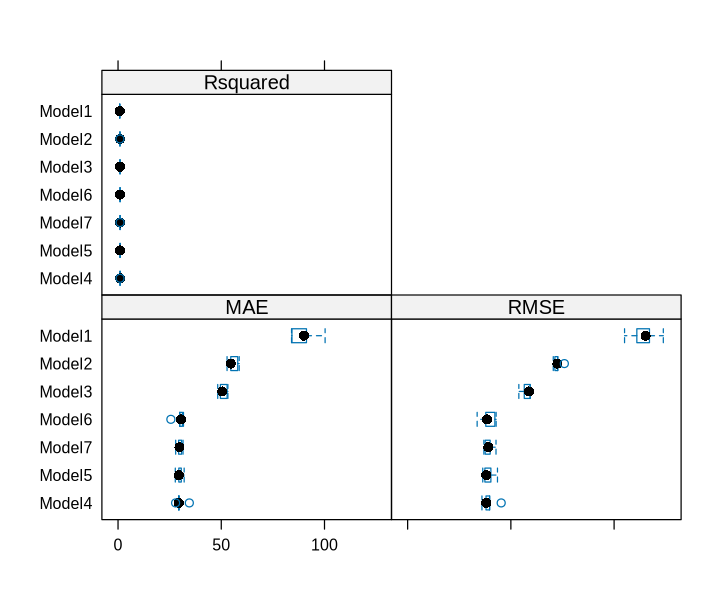

In [61]:
results <- resamples(list(
  Model1 = model_1,
  Model2 = model_2,
  Model3 = model_3,
  Model4 = model_4,
  Model5 = model_5,
  Model6 = model_6,
  Model7 = model_7
))

summary(results)
bwplot(results)  # Boxplot of RMSE, R², MAE across 5 folds
